In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math
import cv2

In [2]:
def change_brightness(img, bias):
    row, column, channel = img.shape
    img = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
    img=  img.astype(np.uint16) + bias
    img = np.clip(img,0,255)
    img = img.reshape((row, column, channel))
    return img

In [3]:
def change_contrast(img, alpha):
    row, column, channel = img.shape
    img = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
    img=  img.astype(np.uint16) * alpha
    img = np.clip(img,0,255)
    img = img.reshape((row, column, channel))
    return img

In [4]:
def brightness_contrast(img, alpha, bias):
    row,column,channel = img.shape #lấy shape
    img = img.reshape(img.shape[0] * img.shape[1], img.shape[2]) #reshape
    img = (img.astype(np.uint16) * alpha) + bias
    img = np.clip(img,0,255)
    img = img.reshape((row, column, channel)) #reshape to 2D
    return img

In [5]:
def Logarithm_mapping(img):
    row,column,channel = img.shape #lấy shape
    img = img.reshape(img.shape[0] * img.shape[1], img.shape[2]) #reshape
    
    c = 255 / np.log(1 + np.max(img.ravel()))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i][j] != 0):
                img[i][j] = np.log(img[i][j].astype(np.uint32) + 1) * c
    
    img = np.clip(img,0,255)
    img = img.reshape((row, column, channel)) #reshape to 2D
    return img



In [39]:
def Exponential_mapping(img):
    row,column,channel = img.shape #lấy shape
    img = img.reshape(img.shape[0] * img.shape[1], img.shape[2]) #reshape
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j] = np.exp(img[i][j].astype(np.uint16))
    img = np.clip(img,0,255)
    img = img.reshape((row, column, channel)) #reshape to 2D
    return img

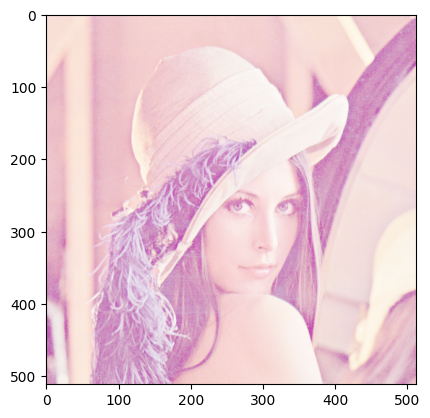

In [101]:
#Đọc ảnh
raw_img = cv2.imread('Lenna.png',  cv2.IMREAD_COLOR)
raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
if raw_img is None:
    print("Khong doc duoc anh")
#raw_img = np.array(raw_img,dtype=np.intc)
plt.imshow(Logarithm_mapping(raw_img ))
plt.show()

C:\Users\phand\AppData\Local\Temp\ipykernel_31772\4152688574.py:6: RuntimeWarning: overflow encountered in exp
  img[i][j] = np.exp(img[i][j].astype(np.uint16))


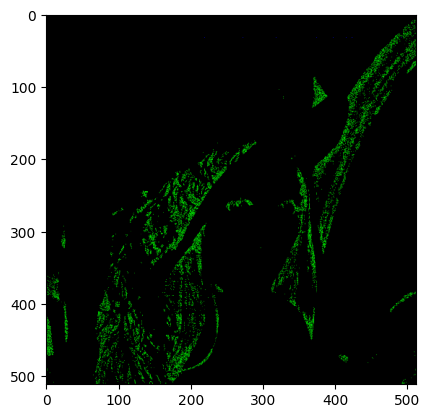

In [41]:
new_img = Exponential_mapping(raw_img)
plt.imshow(new_img)
plt.show()

In [35]:
def calc_hist(img):
    hist = np.zeros((256,), np.uint8)
    height = img.shape[0]
    width = img.shape[1]
    for i in range(height):
        for j in range(width):
            hist[img[i][j]] += 1
    return hist

In [36]:
def equal_hist(hist):
    cumulator = np.zeros_like(hist, np.float64)
    for i in range(len(cumulator)):
        cumulator[i] = hist[:i].sum()
    new_hist = (cumulator - cumulator.min())/(cumulator.max() - cumulator.min()) * 255
    new_hist = np.uint8(new_hist)
    return new_hist

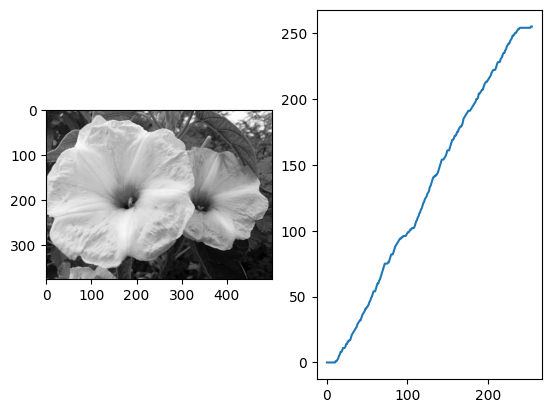

In [38]:
#https://viblo.asia/p/xu-li-anh-thuat-toan-can-bang-histogram-anh-GrLZDOogKk0?fbclid=IwAR3LrqdEcKTwfEAJhT_fhAu1hXfA5dw3NC9pZyng0pwHcfP3S5DLfRAA0o8
img = cv2.imread("gray.png", 0)
hist = calc_hist(img).ravel()
new_hist = equal_hist(hist)

h, w = img.shape[:2]
for i in range(h):
   for j in range(w):
       img[i,j] = new_hist[img[i,j]]
       
fig = plt.figure()
ax = plt.subplot(121)
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.plot(new_hist)
plt.show()

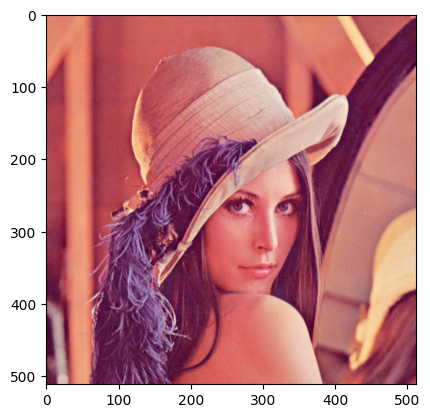

In [90]:
simg = cv2.imread('Lenna.png',  cv2.IMREAD_COLOR)
simg = cv2.cvtColor(simg, cv2.COLOR_BGR2RGB)
if simg is None:
    print("Khong doc duoc anh")

In [72]:
def convolution(image, kernel, average=False):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
    
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    result = np.zeros(image.shape)

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image


    for row in range(image_row):
        for col in range(image_col):
            result[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                result[row, col] /= kernel.shape[0] * kernel.shape[1]

    
    
    return result

In [73]:
def calc_h(x, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power(x / sd, 2) / 2)

In [74]:
def gaussian_kernel(size, sigma=1):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = calc_h(kernel_1D[i], sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)

    kernel_2D *= 1.0 / kernel_2D.max()


    return kernel_2D

In [75]:
def gaussian_blur(image, kernel_size):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size))
    return convolution(image, kernel, average=True)


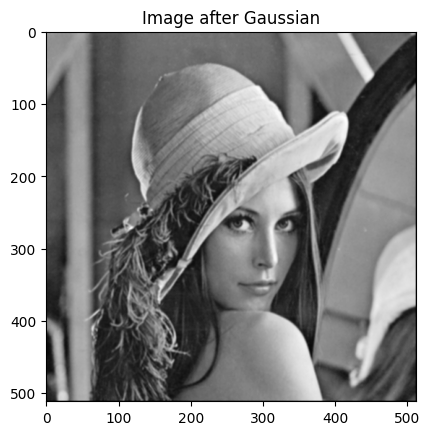

In [102]:
plt.imshow(gaussian_blur(simg, 3), cmap='gray')
plt.title("Image after Gaussian")
plt.show()

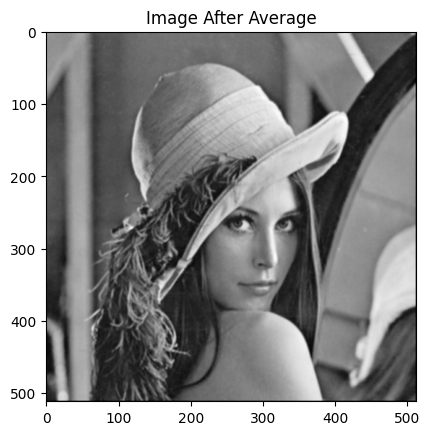

In [77]:
mask = np.ones([3, 3], dtype=int)
mask = mask / 9

plt.imshow(convolution(simg, mask, average=True), cmap='gray')
plt.title("Image After Average")
plt.show()

In [62]:
def the_box(matrix, index):
    left = max(0, index[0] - 1)
    right = max(0, index[0] + 2)

    bottom = max(0, index[1] - 1)
    top = max(0, index[1] + 2)

    if (abs(left - right) < 2):
        return False

    box = matrix[left:right, bottom:top]
    box = np.sort(box)
    
    return np.median(box)

def median_filter(matrix):   
    new_img = matrix
    
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if the_box(matrix, (i,j)) == False:
                continue
            new_img[i][j] = the_box(matrix, (i,j))

    return new_img

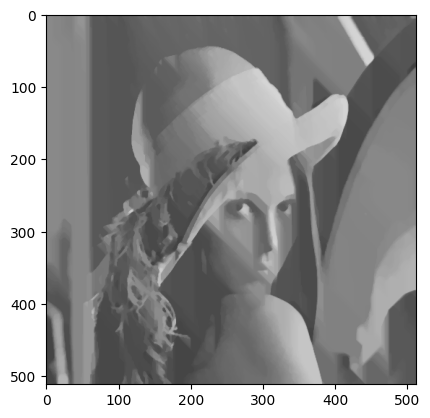

In [63]:
simg = np.array(simg,dtype=np.intc)
plt.imshow(median_filter(simg))
plt.show()

In [19]:
edge_img = cv2.imread('Lenna.png',  cv2.IMREAD_COLOR)
edge_img = cv2.cvtColor(edge_img, cv2.COLOR_BGR2RGB)
if edge_img is None:
    print("Khong doc duoc anh")

In [79]:
def gradient_magnitude(img_x, img_y):
    gradient_magnitude = np.sqrt(np.square(img_x) + np.square(img_y))
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
    return gradient_magnitude

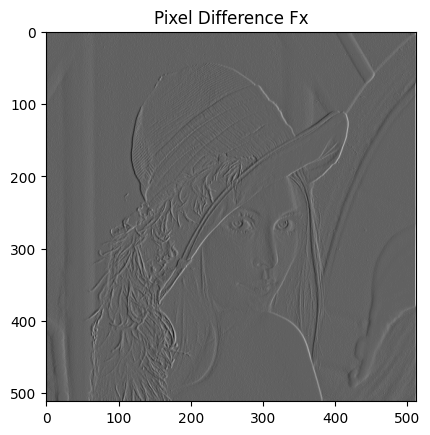

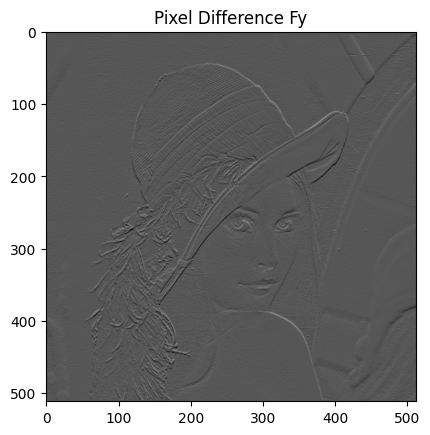

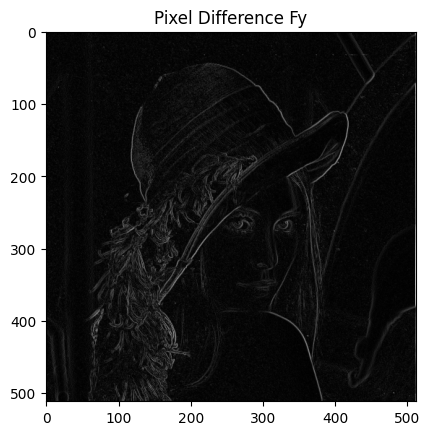

In [80]:
#Pixel Difference main

Wx = np.array([[0,0,0],[0,1,-1],[0,0,0]], dtype=int)
Wy = np.array([[0,-1,0], [0,1,0],[0,0,0]], dtype=int)

plt.imshow(convolution(edge_img, Wx, average=True), cmap='gray')
plt.title("Pixel Difference Fx")
plt.show()

plt.imshow(convolution(edge_img, Wy, average=True), cmap='gray')
plt.title("Pixel Difference Fy")
plt.show()

plt.imshow(gradient_magnitude(convolution(edge_img, Wx, average=True),convolution(edge_img, Wy, average=True)), cmap='gray')
plt.title("Final Result")
plt.show()

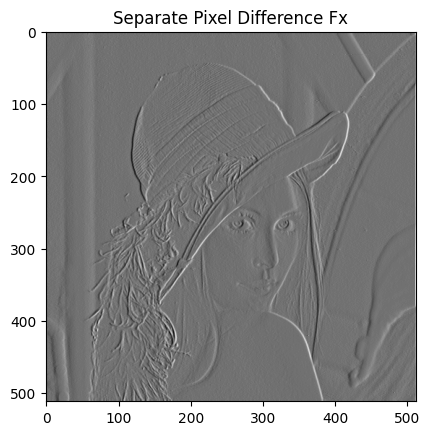

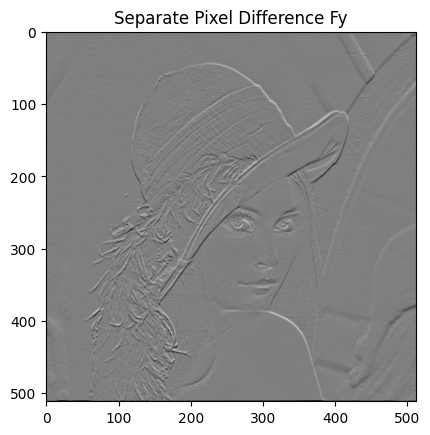

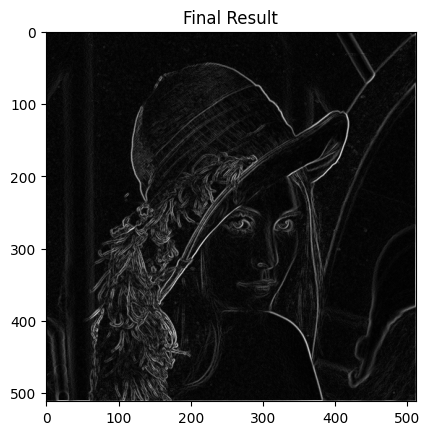

In [81]:
#Separate Pixel Difference Main
Wy = np.array([[0,-1,0], [0,0,0],[0,1,0]], dtype=int)
Wx = np.array([[0,0,0],[1,0,-1],[0,0,0]], dtype=int)

plt.imshow(convolution(edge_img, Wx, average=True), cmap='gray')
plt.title("Separate Pixel Difference Fx")
plt.show()

plt.imshow(convolution(edge_img, Wy, average=True), cmap='gray')
plt.title("Separate Pixel Difference Fy")
plt.show()

plt.imshow(gradient_magnitude(convolution(edge_img, Wx, average=True),convolution(edge_img, Wy, average=True)), cmap='gray')
plt.title("Final Result")
plt.show()

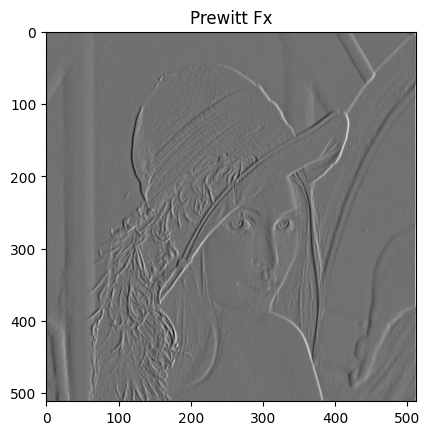

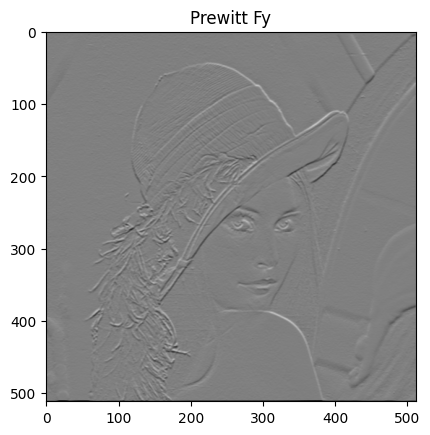

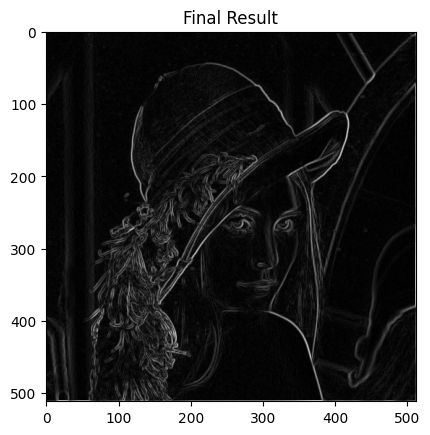

In [82]:
#Prewitt operator main
Wx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]], dtype=int)
Wy = np.array([[-1,-1,-1], [0,0,0],[1,1,1]], dtype=int)
Wx = Wx / 3
Wy = Wy / 3

plt.imshow(convolution(edge_img, Wx, average=True), cmap='gray')
plt.title("Prewitt Fx")
plt.show()

plt.imshow(convolution(edge_img, Wy, average=True), cmap='gray')
plt.title("Prewitt Fy")
plt.show()

plt.imshow(gradient_magnitude(convolution(edge_img, Wx, average=True),convolution(edge_img, Wy, average=True)), cmap='gray')
plt.title("Final Result")
plt.show()

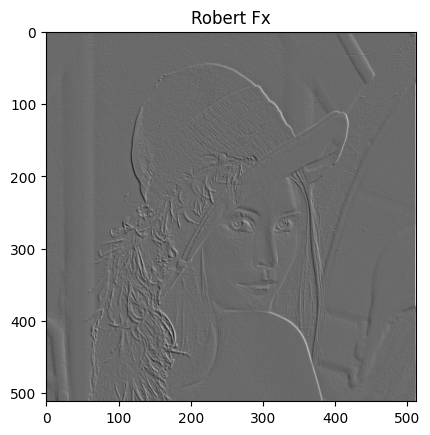

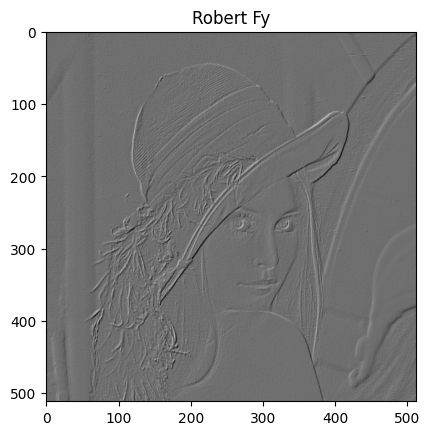

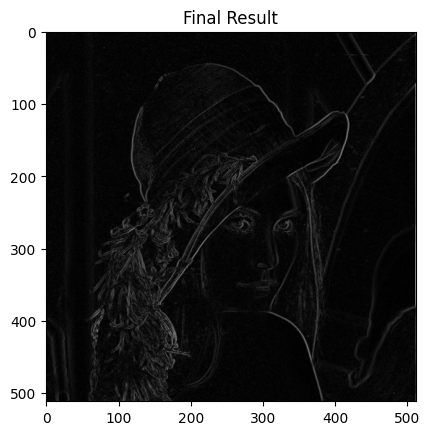

In [83]:
#Robert operator main
Wx = np.array([[0,0,-1],[0,1,0],[0,0,0]], dtype=int)
Wy = np.array([[-1,0,0], [0,1,0],[0,0,0]], dtype=int)

plt.imshow(convolution(edge_img, Wx, average=True), cmap='gray')
plt.title("Robert Fx")
plt.show()

plt.imshow(convolution(edge_img, Wy, average=True), cmap='gray')
plt.title("Robert Fy")
plt.show()

plt.imshow(gradient_magnitude(convolution(edge_img, Wx, average=True),convolution(edge_img, Wy, average=True)), cmap='gray')
plt.title("Final Result")
plt.show()

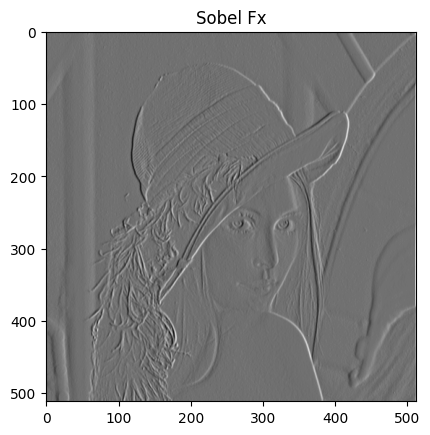

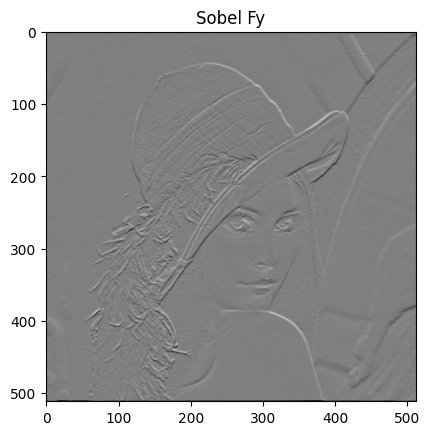

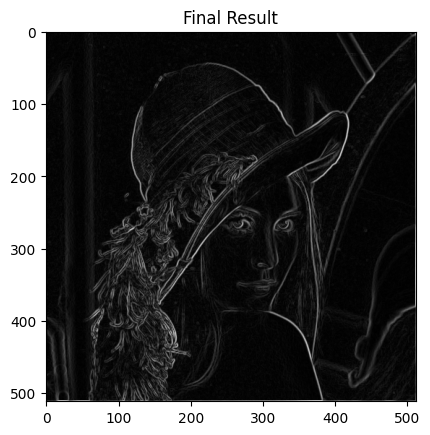

In [84]:
#Sobel oprator main
Wx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], dtype=int)
Wx = Wx / 4
Wy = np.array([[-1,-2,-1], [0,0,0],[1,2,1]], dtype=int)
Wy = Wy / 4

plt.imshow(convolution(edge_img, Wx, average=True), cmap='gray')
plt.title("Sobel Fx")
plt.show()

plt.imshow(convolution(edge_img, Wy, average=True), cmap='gray')
plt.title("Sobel Fy")
plt.show()

plt.imshow(gradient_magnitude(convolution(edge_img, Wx, average=True),convolution(edge_img, Wy, average=True)), cmap='gray')
plt.title("Final Result")
plt.show()

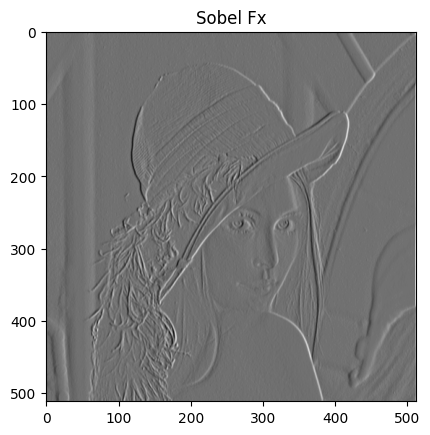

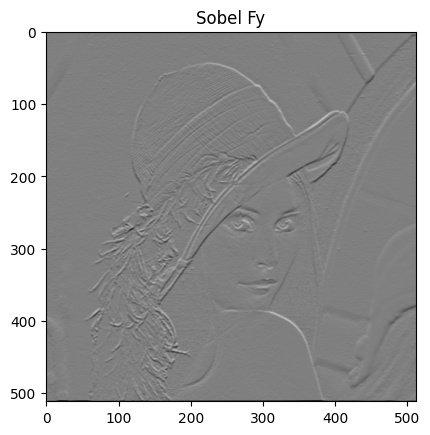

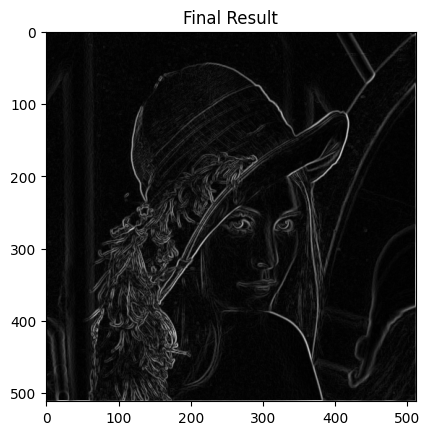

In [86]:
#Frei-chen main
Wx = np.array([[1,0,-1],[np.sqrt(2),0,-np.sqrt(2)],[1,0,-1]], dtype=float)
Wx = Wx / (2+np.sqrt(2))
Wy = np.array([[-1,-np.sqrt(2),-1], [0,0,0],[1,np.sqrt(2),1]], dtype=float)
Wy = Wy / (2+np.sqrt(2))

plt.imshow(convolution(edge_img, Wx, average=True), cmap='gray')
plt.title("Sobel Fx")
plt.show()

plt.imshow(convolution(edge_img, Wy, average=True), cmap='gray')
plt.title("Sobel Fy")
plt.show()

plt.imshow(gradient_magnitude(convolution(edge_img, Wx, average=True),convolution(edge_img, Wy, average=True)), cmap='gray')
plt.title("Final Result")
plt.show()

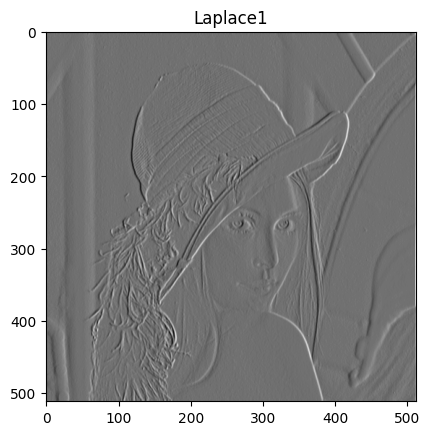

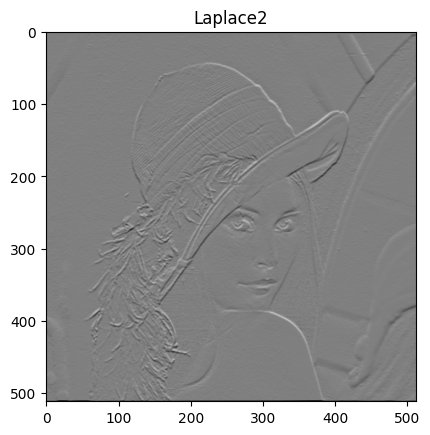

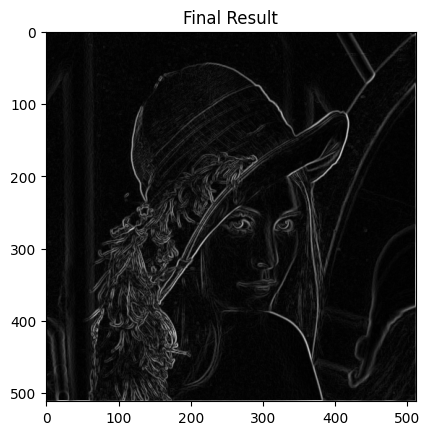

In [87]:
#Main Laplace
Laplace1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], dtype=int)

Laplace2 = np.array([[-1,-2,-1], [0,0,0],[1,2,1]], dtype=int)
plt.imshow(convolution(edge_img, Laplace1, average=True), cmap='gray')
plt.title("Laplace1")
plt.show()

plt.imshow(convolution(edge_img, Laplace2, average=True), cmap='gray')
plt.title("Laplace2")
plt.show()
